**Mateo Alexander**

In [ ]:
**Professor Jonathan Stiles**

In [ ]:
**Ex

In [1]:
# Essential import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tree Based Methods

### Regression Trees
#### *Let's compare three approaches to predicting Census block group median housing cost using the California Housing Dataset* 

#### 1: Single Decision Tree
*DATASET REMINDER*  
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [2]:
# Load the built-in data from sklearn
from sklearn.datasets import fetch_california_housing
calhousing_dataset = fetch_california_housing()
print(calhousing_dataset.keys())
# Do our usual split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(calhousing_dataset.data, calhousing_dataset.target, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
X_train shape: (15480, 8)
y_train shape: (15480,)
X_test shape: (5160, 8)
y_test shape: (5160,)


In [3]:
# Fit a single Decision Tree with a default depth of 3 and minimum leaf samples of 10
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10).fit(X_train, y_train)
# Make a prediction using imagined data
print('A prediction: ', tree.predict(np.array([[8.8,9,10,2,6523,3,36.692408,-121.612099]])))
# Compare the train and test scores (higher is better fit)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Calculate the Root Mean Squared Error (lower is better fit)
predictions = tree.predict(X_test)
RMSE = mean_squared_error(y_test, predictions, squared=False)
print(RMSE)

A prediction:  [4.6064587]
Accuracy on training set: 0.542
Accuracy on test set: 0.509
0.8059345431783937


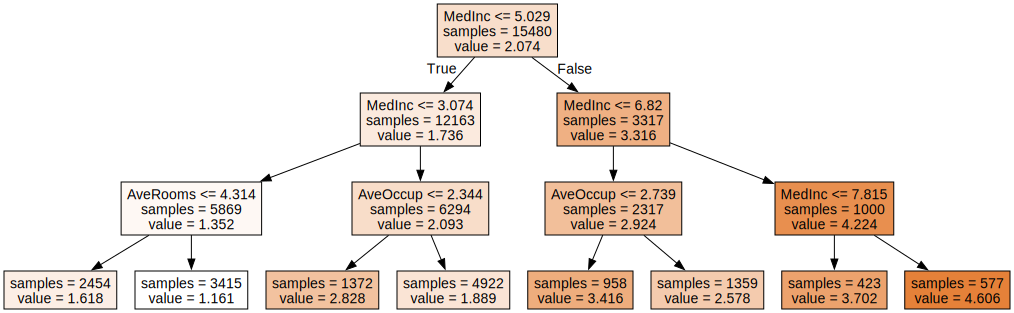

In [4]:
# Output and show a branch diagram 
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=calhousing_dataset.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### *Try changing the max_depth and min-value and seeing how it changes the decision tree and score*

#### 2: Random Forest

In [5]:
# Fit a Random Forest regressor
# The n_estimators parameter is the number trees to be averaged
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
# Make a prediction using imagined data
print('A prediction: ', forest.predict(np.array([[8.8,9,10,2,6523,3,36.692408,-121.612099]])))
# Compare the train and test scores (higher is better fit)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
# Calculate the Root Mean Squared Error (lower is better fit)
from sklearn.metrics import mean_squared_error
predictions = forest.predict(X_test)
RMSE = mean_squared_error(y_test, predictions, squared=False)
print(RMSE)
# Display the feature importance measures
display(pd.DataFrame(zip(calhousing_dataset.feature_names, forest.feature_importances_)))

A prediction:  [4.4830345]
Accuracy on training set: 0.973
Accuracy on test set: 0.794
0.5222913928703874


,0,1
0,MedInc,0.529807
1,HouseAge,0.056420
2,AveRooms,0.049577
3,AveBedrms,0.030600
4,Population,0.031323
5,AveOccup,0.136067
6,Latitude,0.082685
7,Longitude,0.083520


#### 3: Linear Regression (OLS)

In [6]:
# Fit an OLS Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
# Make a prediction using imagined data
print('A prediction: ', lr.predict(np.array([[8.8,9,10,2,6523,3,36.692408,-121.612099]])))
# Compare the train and test scores (higher is better fit)
print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))
# Calculate the Root Mean Squared Error (lower is better fit)
predictions = lr.predict(X_test)
RMSE = mean_squared_error(y_test, predictions, squared=False)
print(RMSE)
# Display the coefficients
display(pd.DataFrame(zip(calhousing_dataset.feature_names, lr.coef_)))

A prediction:  [4.53212182]
Training set score: 0.6110
Test set score: 0.5912
0.7351277481981685


,0,1
0,MedInc,0.439091
1,HouseAge,0.009599
2,AveRooms,-0.103311
3,AveBedrms,0.616730
4,Population,-0.000008
5,AveOccup,-0.004488
6,Latitude,-0.417353
7,Longitude,-0.430614


#### **Assessing the Comparison**: Random Forest was the most accurate followed by OLS and  lastly the single decision tree. OLS has the advantage that it comes with coefficients and p-values. For prediction, Random Forest seems the best choice. For explanation, OLS seems the best choice.

### Classification Trees

#### Single Decision Tree with a Cancer Diagnosis Dataset

In [7]:
# Let's load a new sample dataset that is provided with sklearn
# Details are here: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print(cancer_dataset.keys())
# Since this is a new dataset lets examine the data and target names and values
display(cancer_dataset.target_names)
display(cancer_dataset.feature_names)
#display(cancer_dataset.data)
#display(cancer_dataset.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array(['malignant', 'benign'], dtype='<U9')

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# Let's do our usual split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, stratify=cancer_dataset.target, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [9]:
# Fit a single Decision Tree Classifier with all defaults
# Depth is another way to tune trees to prevent overfitting
# The default for max_depth is None
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
# Compare the train and test scores (higher is better fit)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [10]:
# Now let's try it with a maximum depth of 3
# Note what happens to the relationship between train and test accuracy
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
# Compare the train and test scores (higher is better fit)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.944


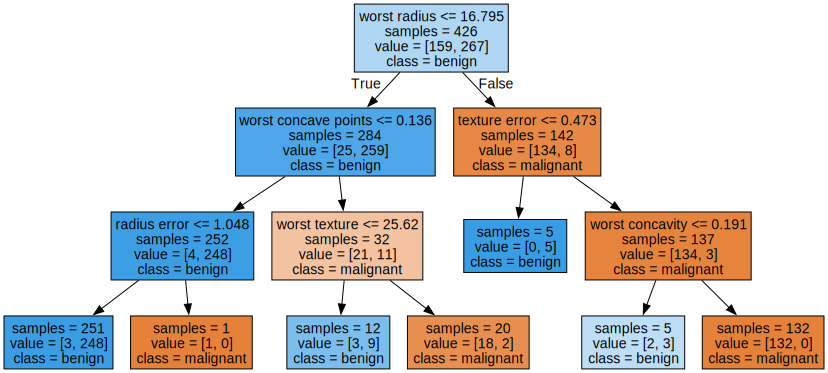

In [11]:
# Output and show a branch diagram 
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer_dataset.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Finally, let's compare two approaches to predicting arterial road class with our Road Class dataset 
#### 1. Single Decision Tree

In [12]:
# First we will load and preview the CSV dataset
columbusroads_df = pd.read_csv('lab3_data_roads.csv')
print(columbusroads_df.shape)
print(columbusroads_df.dtypes)
print(columbusroads_df.head(10))

(6088, 6)
CLASS_NUM       int64
CLASS_STR      object
LANES           int64
LANES_WID     float64
MEDIAN_WID      int64
SHLD_TOT        int64
dtype: object
   CLASS_NUM CLASS_STR  LANES  LANES_WID  MEDIAN_WID  SHLD_TOT
0          1  Arterial      6       12.0          50        14
1          1  Arterial      6       12.0          50        14
2          1  Arterial      4       12.0          48        16
3          1  Arterial      4       12.0          48        16
4          1  Arterial      4       12.0          48        16
5          1  Arterial      4       12.0          48        16
6          1  Arterial      4       12.0          48        16
7          1  Arterial      4       12.0          48        16
8          1  Arterial      4       12.0          48        16
9          1  Arterial      4       12.0          48        16


In [13]:
# Do our usual split into training and testing data
from sklearn.model_selection import train_test_split
features_to_use = ['LANES', 'LANES_WID', 'MEDIAN_WID', 'SHLD_TOT']
X_data = columbusroads_df[features_to_use].to_numpy()
y_data = columbusroads_df['CLASS_NUM'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4566, 4)
y_train shape: (4566,)
X_test shape: (1522, 4)
y_test shape: (1522,)


In [14]:
# Fit a Decision Tree Classifier with a max_depth of 3 and min_samples_leaf of 10
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)
# Compare the train and test scores (higher is better accuracy)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Let's also get more information on performance using a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,tree.predict(X_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.838
[[792  73]
 [174 483]]


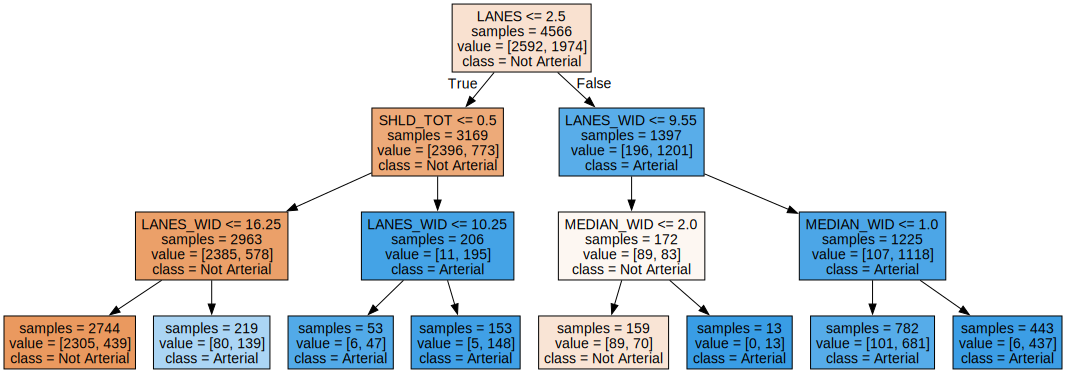

In [15]:
# Output and show a branch diagram 
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Not Arterial", "Arterial"],
                feature_names=features_to_use, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 2. Logistic Regression

In [16]:
# Fit a Logistic Regression training model
# Make predictions, view scores and coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=5).fit(X_train, y_train)
# Compare the train and test scores (higher is better accuracy)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# To view the coefficients as odds ratios we need to exponentiate them
coef_oddsratios = np.exp(logreg.coef_)
display(pd.DataFrame(zip(features_to_use, coef_oddsratios[0])))
# Let's also get more information on performance using a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logreg.predict(X_test)))

Training set score: 0.837
Test set score: 0.840


,0,1
0,LANES,3.768729
1,LANES_WID,1.232916
2,MEDIAN_WID,1.078024
3,SHLD_TOT,2.142169


[[800  65]
 [178 479]]


#### **Assessing the Comparison**: For the simple classification task found in the Road Class dataset, both a Single Decision Tree and Logistic Regression perform comparatively well. The LR coeficcients may be more useful than the tree visualization for some purposes.